In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
cardioData = pd.read_csv('cardio_train_fixed.csv')
cardioData.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
print("Data type : ", type(cardioData))
print("Data dims : ", cardioData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (140000, 13)


In [4]:
print(cardioData.info)

<bound method DataFrame.info of            id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0           0  18393       2     168    62.0    110     80            1     1   
1           1  20228       1     156    85.0    140     90            3     1   
2           2  18857       1     165    64.0    130     70            3     1   
3           3  17623       2     169    82.0    150    100            1     1   
4           4  17474       1     156    56.0    100     60            1     1   
...       ...    ...     ...     ...     ...    ...    ...          ...   ...   
139995  99993  19240       2     168    76.0    120     80            1     1   
139996  99995  22601       1     158   126.0    140     90            2     2   
139997  99996  19066       2     183   105.0    180     90            3     1   
139998  99998  22431       1     163    72.0    135     80            1     2   
139999  99999  20540       1     170    72.0    120     80            2     1

In [5]:
cardioData['height_metres'] = cardioData['height'] / 100 #Converts cm to m
cardioData['BMI'] = cardioData['weight'] / (cardioData['height_metres'] ** 2) #Calculates BMI using their height and weight

cardioData['age_years'] = np.round(cardioData['age'] / 365) #Age in days rounded to the nearest whole number

print(cardioData[['height_metres', 'weight', 'BMI', 'age_years']].head())

   height_metres  weight        BMI  age_years
0           1.68    62.0  21.967120       50.0
1           1.56    85.0  34.927679       55.0
2           1.65    64.0  23.507805       52.0
3           1.69    82.0  28.710479       48.0
4           1.56    56.0  23.011177       48.0


In [6]:
cardioAge = pd.DataFrame(cardioData.get('age_years', [])) #Age in years rounded to the nearest whole number 
cardioGender = pd.DataFrame(cardioData.get('gender', [])) #Gender 1 - Women, 2 - Men
cardioHeight = pd.DataFrame(cardioData.get('height', [])) #Height in cm
cardioWeight = pd.DataFrame(cardioData.get('weight', [])) #Weight in kg
cardioBMI = pd.DataFrame(cardioData.get('BMI', [])) #BMI
cardioHighBP = pd.DataFrame(cardioData.get('ap_hi', [])) #Systolic blood pressure
cardioLowBP = pd.DataFrame(cardioData.get('ap_lo', [])) #Diastolic blood pressure
cardioCholesterol = pd.DataFrame(cardioData.get('cholesterol', [])) #Cholesterol, 1: normal, 2: above normal, 3: well above normal
cardioGlucose = pd.DataFrame(cardioData.get('gluc', [])) #Glucose, 1: normal, 2: above normal, 3: well above normal
cardioSmoking = pd.DataFrame(cardioData.get('smoke', [])) #Smoke, whether the patient smokes 0 - No, 1 - Yes
cardioAlcohol = pd.DataFrame(cardioData.get('alco', [])) #Alcohol intake, 0 - No, 1 - Yes
cardioPhysical = pd.DataFrame(cardioData.get('active', [])) #Active, 0 - No, 1 - Yes
cardioTest = pd.DataFrame(cardioData.get('cardio', [])) #Presence or absence of cardiovascular disease, 0 - No, 1 - Yes

In [7]:
print(cardioAge) #converted from age in days to age in years, rounded to the nearest whole number

        age_years
0            50.0
1            55.0
2            52.0
3            48.0
4            48.0
...           ...
139995       53.0
139996       62.0
139997       52.0
139998       61.0
139999       56.0

[140000 rows x 1 columns]


In [8]:
cardioNumData = pd.DataFrame(cardioData[['age_years', 'gender', 'height', 'weight', 'cholesterol', 'cardio', 'BMI', 'ap_hi', 'ap_lo']])
print(cardioNumData)

        age_years  gender  height  weight  cholesterol  cardio        BMI  \
0            50.0       2     168    62.0            1       0  21.967120   
1            55.0       1     156    85.0            3       1  34.927679   
2            52.0       1     165    64.0            3       1  23.507805   
3            48.0       2     169    82.0            1       1  28.710479   
4            48.0       1     156    56.0            1       0  23.011177   
...           ...     ...     ...     ...          ...     ...        ...   
139995       53.0       2     168    76.0            1       0  26.927438   
139996       62.0       1     158   126.0            2       1  50.472681   
139997       52.0       2     183   105.0            3       1  31.353579   
139998       61.0       1     163    72.0            1       1  27.099251   
139999       56.0       1     170    72.0            2       0  24.913495   

        ap_hi  ap_lo  
0         110     80  
1         140     90  
2     

In [9]:
cardioNumData.describe()

,age_years,gender,height,weight,cholesterol,cardio,BMI,ap_hi,ap_lo
count,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000
mean,53.338686,1.349571,164.359229,74.205690,1.366871,0.499700,27.556513,128.817286,96.630414
std,6.765270,0.476836,8.210097,14.395705,0.680248,0.500002,6.091489,154.010869,188.471857
min,30.000000,1.000000,55.000000,10.000000,1.000000,0.000000,3.471784,-150.000000,-70.000000
25%,48.000000,1.000000,159.000000,65.000000,1.000000,0.000000,23.875115,120.000000,80.000000
50%,54.000000,1.000000,165.000000,72.000000,1.000000,0.000000,26.374068,120.000000,80.000000
75%,58.000000,2.000000,170.000000,82.000000,2.000000,1.000000,30.222222,140.000000,90.000000
max,65.000000,2.000000,250.000000,200.000000,3.000000,1.000000,298.666667,16020.000000,11000.000000


Number of Lot Area : 2
gender
1    91060
2    48940
Name: count, dtype: int64


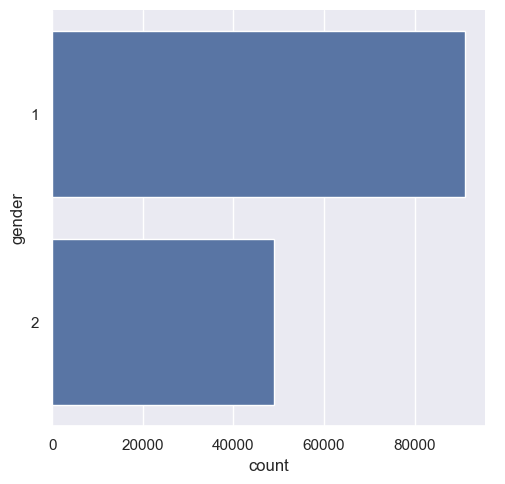

In [10]:
# Generations in the Dataset
print("Number of Lot Area :", len(cardioNumData["gender"].unique()))

# Pokemons in each Generation
print(cardioNumData["gender"].value_counts())
sb.catplot(y = "gender", data = cardioNumData, kind = "count")

IndexError: index 7 is out of bounds for axis 0 with size 7

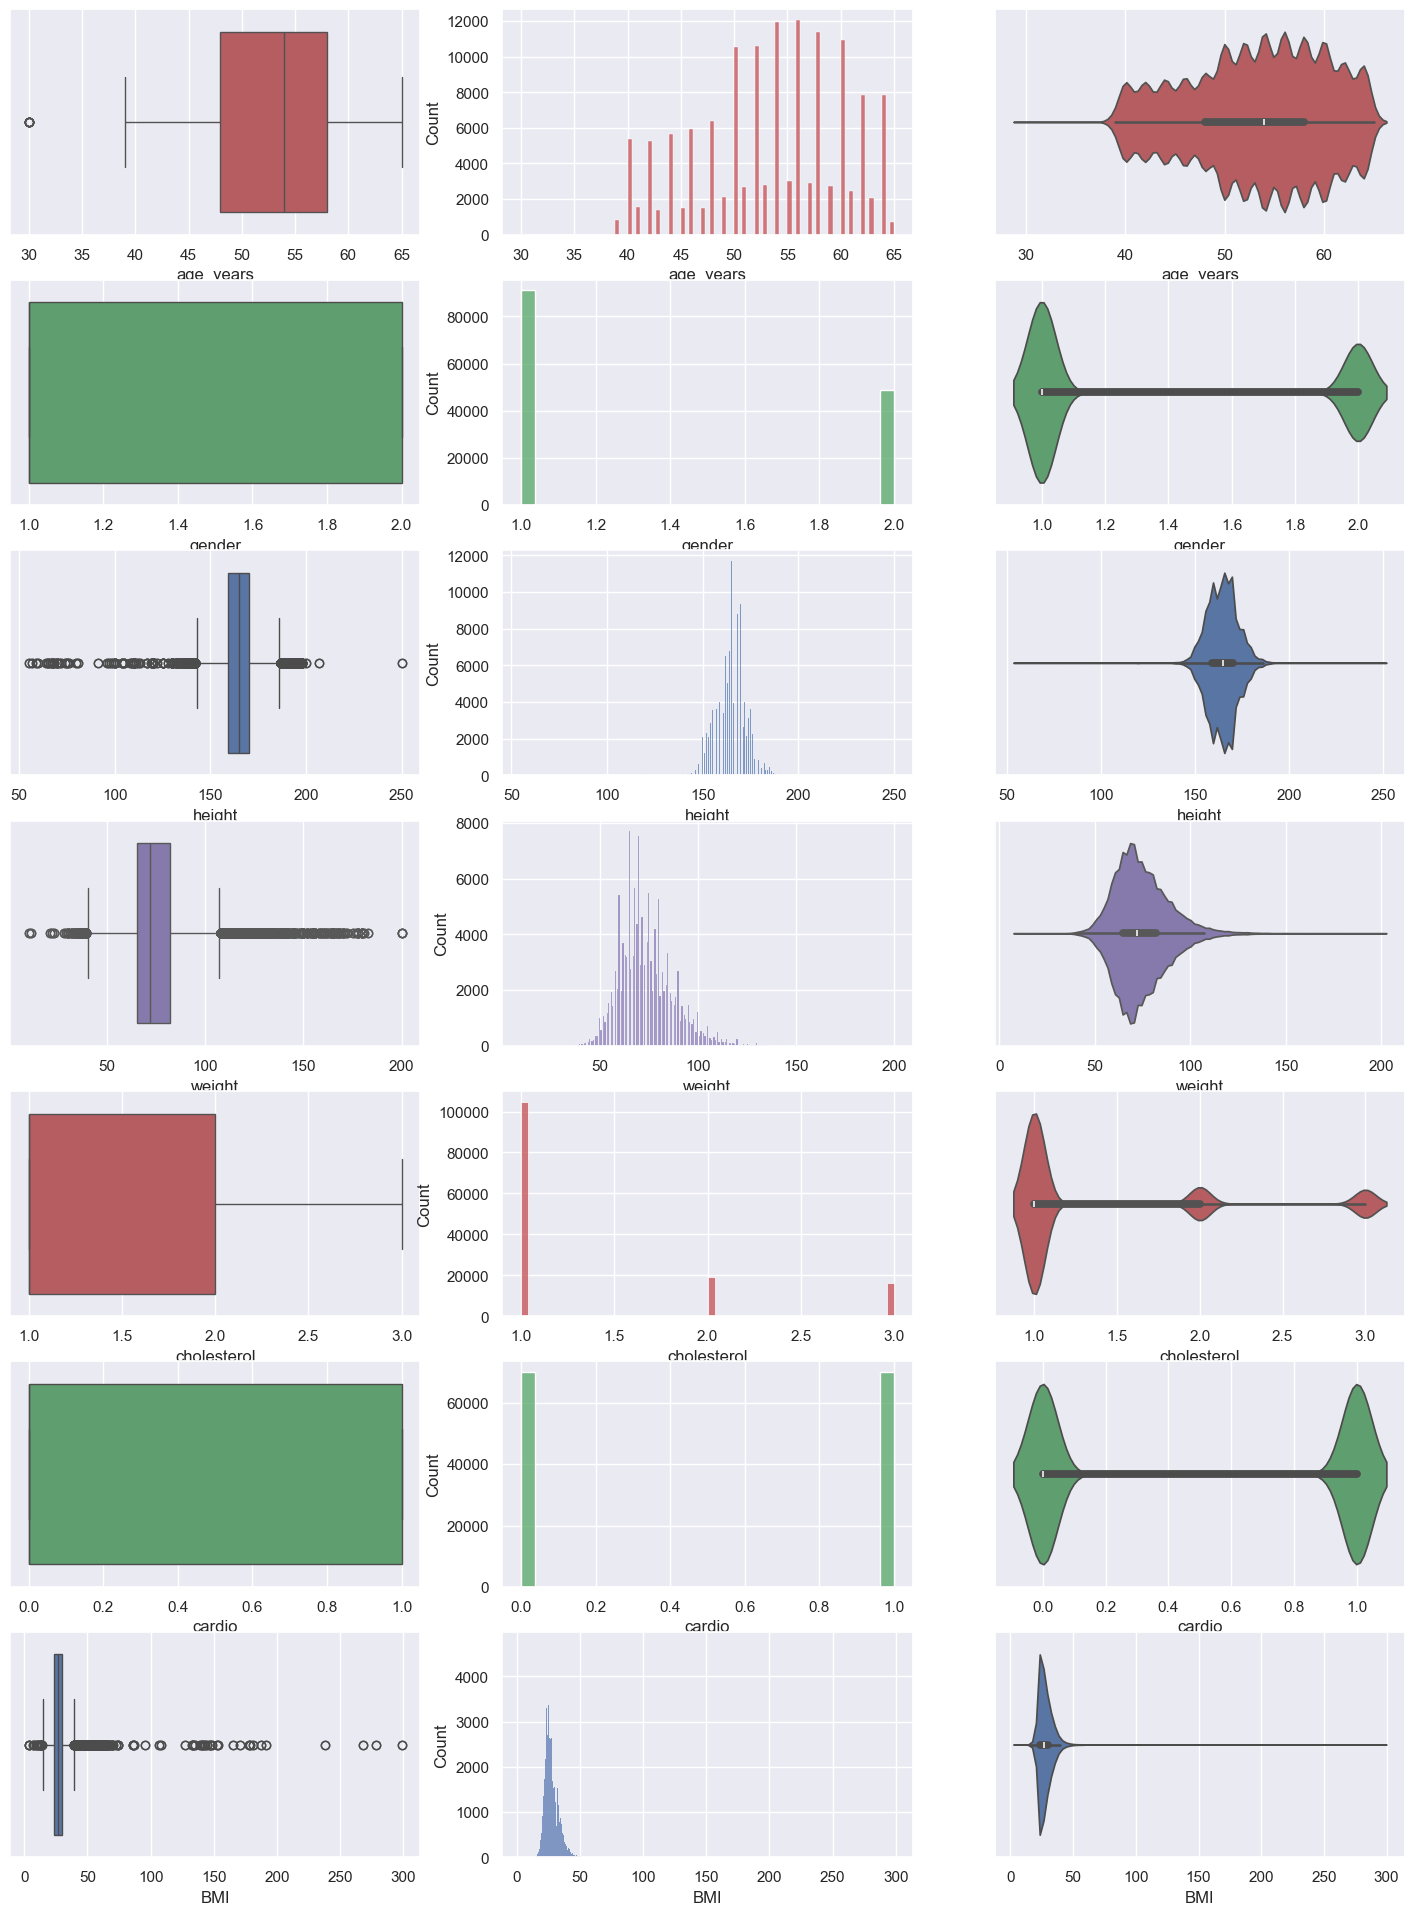

In [11]:
# Draw the distributions of all variables
f, axes = plt.subplots(7, 3, figsize=(18, 24))
colors = ['r', 'g', 'b', 'm']
count = 0
for var in cardioNumData:
    sb.boxplot(data = cardioNumData[var], color = colors[count % len(colors)], orient = "h", ax = axes[count,0])
    sb.histplot(data = cardioNumData[var], color = colors[count % len(colors)], ax = axes[count,1])
    sb.violinplot(data = cardioNumData[var], color = colors[count % len(colors)], orient = "h", ax = axes[count,2])
    count += 1

             age_years    gender    height    weight  cholesterol    cardio  \
age_years     1.000000 -0.023017 -0.081456  0.053661     0.154386  0.237749   
gender       -0.023017  1.000000  0.499033  0.155406    -0.035821  0.008109   
height       -0.081456  0.499033  1.000000  0.290968    -0.050226 -0.010821   
weight        0.053661  0.155406  0.290968  1.000000     0.141768  0.181660   
cholesterol   0.154386 -0.035821 -0.050226  0.141768     1.000000  0.221147   
cardio        0.237749  0.008109 -0.010821  0.181660     0.221147  1.000000   
BMI           0.085422 -0.096529 -0.290642  0.762009     0.146270  0.165632   
ap_hi         0.020793  0.006005  0.005488  0.030702     0.023778  0.054475   
ap_lo         0.017754  0.015254  0.006150  0.043710     0.024019  0.065719   

                  BMI     ap_hi     ap_lo  
age_years    0.085422  0.020793  0.017754  
gender      -0.096529  0.006005  0.015254  
height      -0.290642  0.005488  0.006150  
weight       0.762009  0.030702  

<Axes: >

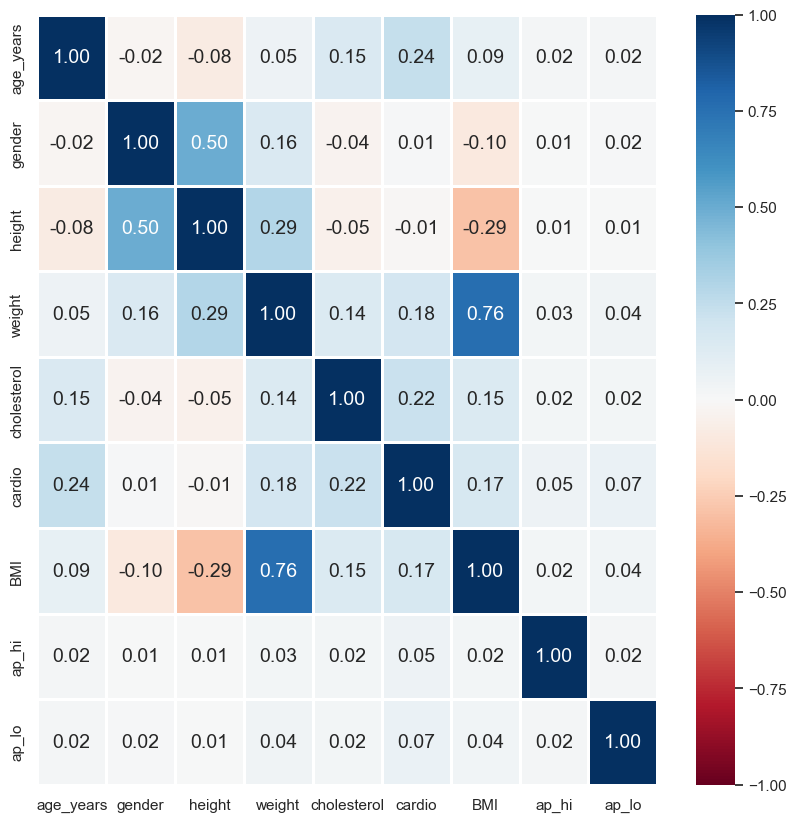

In [12]:
# Correlation Matrix
print(cardioNumData.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(cardioNumData.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

In [14]:
# Draw pairs of variables against one another
#sb.pairplot(data = cardioNumData)

<Axes: xlabel='cardio', ylabel='age_years'>

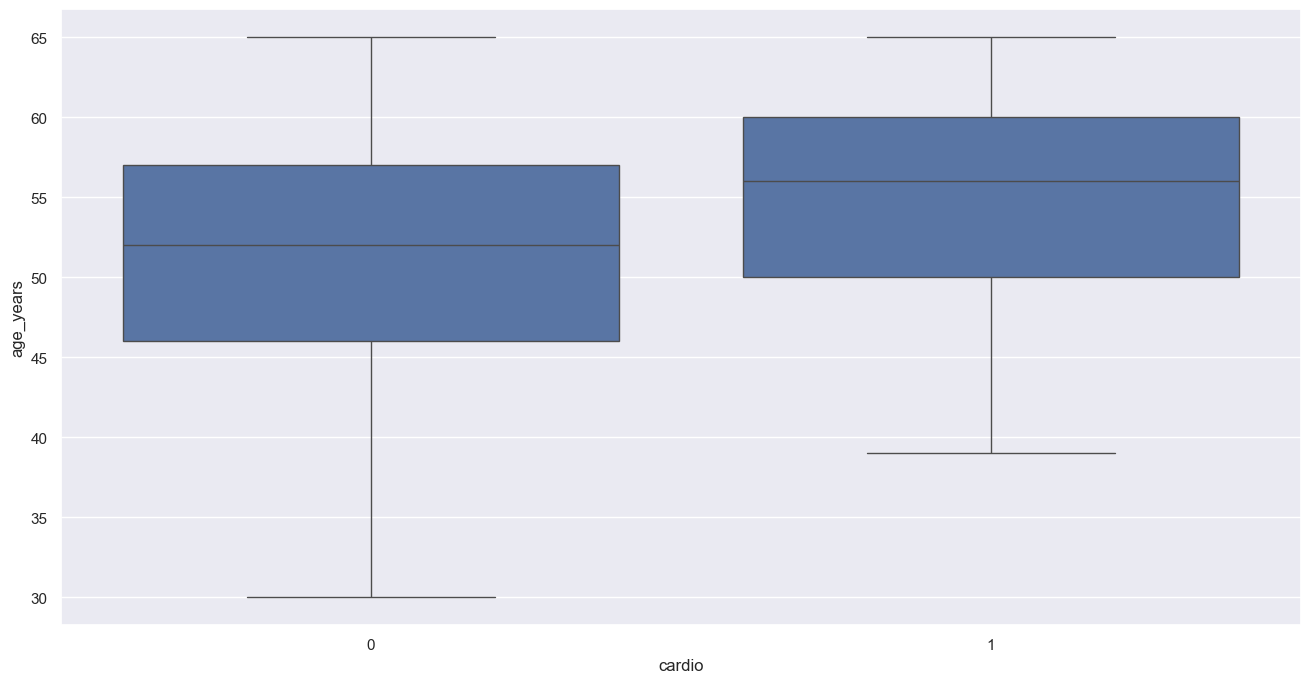

In [16]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'cardio', y = 'age_years', data = cardioNumData)

<Axes: xlabel='cardio', ylabel='BMI'>

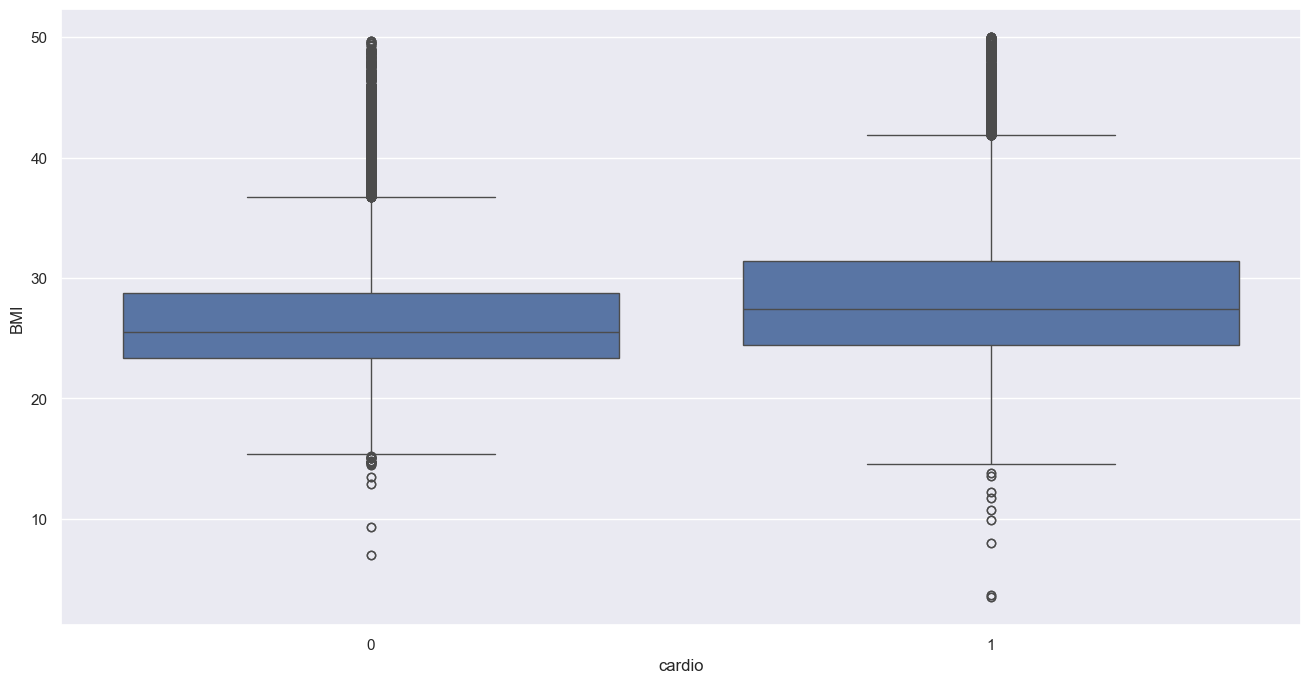

In [18]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'cardio', y = 'BMI', data = cardioNumData.query('BMI <= 50'))

<Axes: xlabel='cardio', ylabel='weight'>

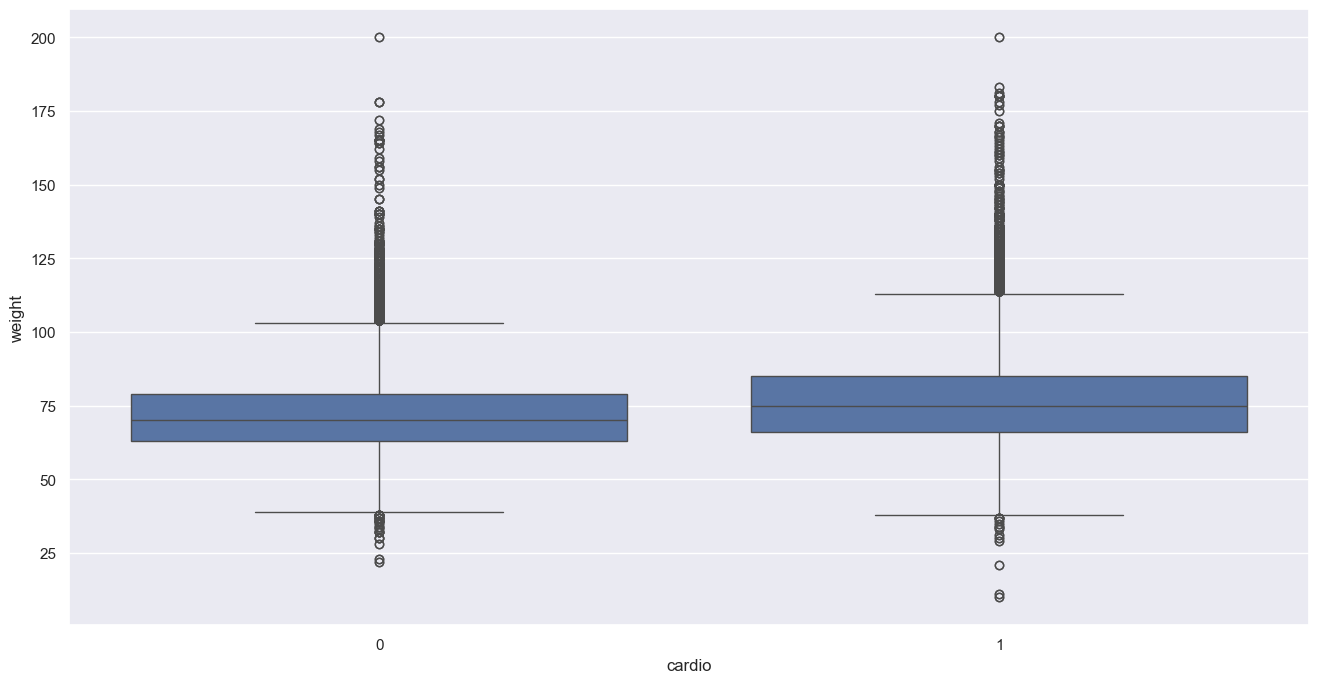

In [20]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'cardio', y = 'weight', data = cardioNumData)

<Axes: xlabel='cardio', ylabel='cholesterol'>

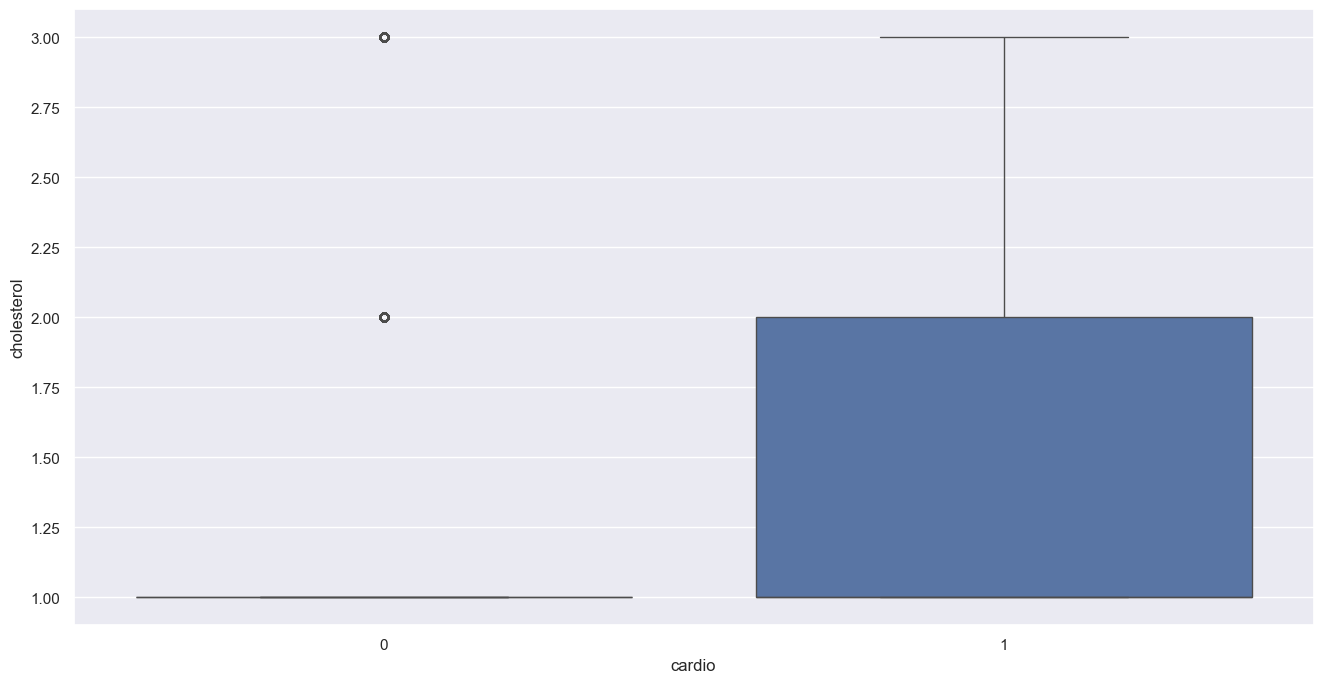

In [22]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'cardio', y = 'cholesterol', data = cardioNumData)

In [24]:
#Early prediction of cardiovascular disease

In [26]:
print(cardioNumData.columns)

Index(['age_years', 'gender', 'height', 'weight', 'cholesterol', 'cardio',
       'BMI', 'ap_hi', 'ap_lo'],
      dtype='object')


In [28]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split

# Selecting the features and target variable
X = cardioNumData.drop(columns=['cardio', 'gender', 'height']) # Dropping columns that have low relevance
y = cardioNumData['cardio'] # Target variable

#Split 80% into training and 20% into testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
# Verify with correlation matrix
print(cardioNumData.corr()['cardio'].abs().sort_values(ascending=False))

cardio         1.000000
age_years      0.237749
cholesterol    0.221147
weight         0.181660
BMI            0.165632
ap_lo          0.065719
ap_hi          0.054475
height         0.010821
gender         0.008109
Name: cardio, dtype: float64


In [50]:
# Training by using a Random Forest Classifier - Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score

# Initializing and training the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicitjg on test set
y_pred_rf = rf.predict(X_test)

print('RF Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

RF Accuracy: 0.8743928571428572
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     14008
           1       0.88      0.86      0.87     13992

    accuracy                           0.87     28000
   macro avg       0.87      0.87      0.87     28000
weighted avg       0.87      0.87      0.87     28000



In [33]:
print(y_train.value_counts())

cardio
0    56034
1    55966
Name: count, dtype: int64


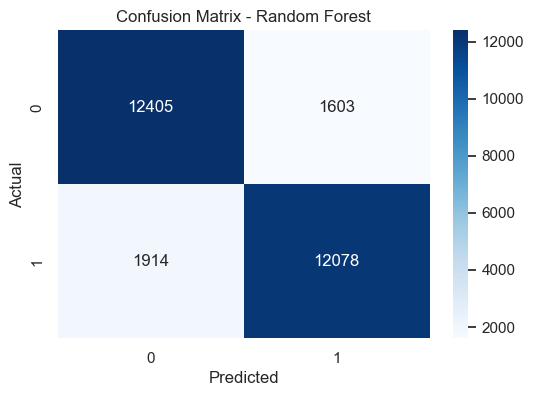

In [36]:
from sklearn.metrics import confusion_matrix

#Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sb.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

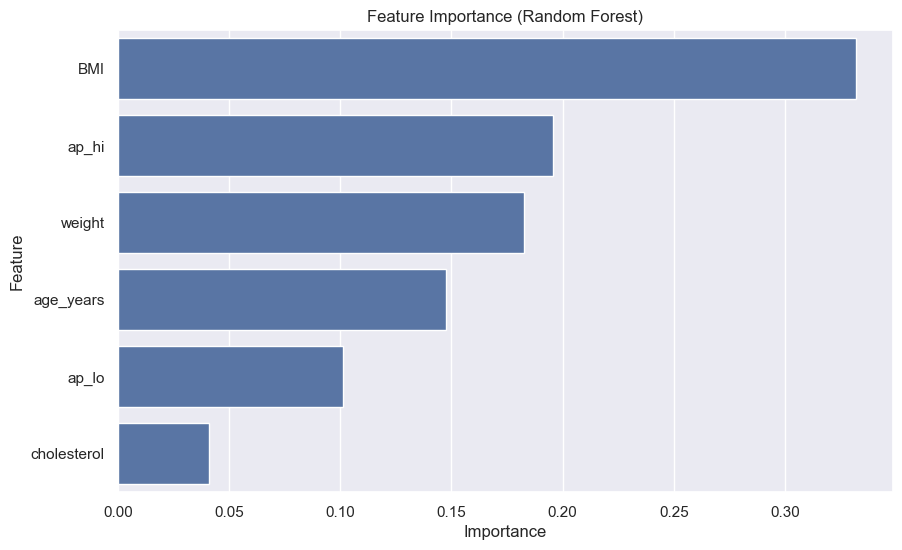

In [38]:
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sb.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.title("Feature Importance (Random Forest)")
plt.show()

In [40]:
#Example of predicting with patient data
new_patient = pd.DataFrame({
    'age_years': [55],
    'weight': [75],
    'cholesterol': [2], #1: normal, 2: above normal, 3: well above normal
    'BMI': [27.55],
    'ap_hi': [140],  #Systolic blood pressure
    'ap_lo': [90]    #Diastolic blood pressure
})

# Predict using trained model
prediction = rf.predict(new_patient)
print("Predicted Cardiovascular Disease Risk:", "Yes" if prediction[0] == 1 else "No")


Predicted Cardiovascular Disease Risk: Yes


In [42]:
#Using Hyperparameter Tuning to further improve RF Classifier using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV #randomly samples hyperparameters instead of testing everyth
from scipy.stats import randint

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
randomsearch = RandomizedSearchCV(rf, params, cv=5, scoring='accuracy')
randomsearch.fit(X_train, y_train)

print(randomsearch.best_params_)
best_rf = randomsearch.best_estimator_

{'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None}


Hypertuning Accuracy: 0.8424642857142857
              precision    recall  f1-score   support

           0       0.84      0.85      0.84     14008
           1       0.85      0.84      0.84     13992

    accuracy                           0.84     28000
   macro avg       0.84      0.84      0.84     28000
weighted avg       0.84      0.84      0.84     28000



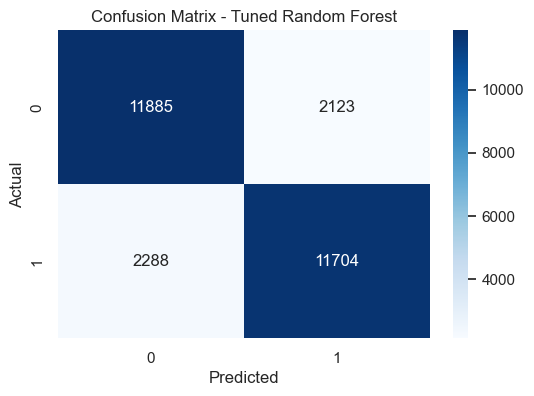

In [44]:
y_pred_best = best_rf.predict(X_test)

print('Hypertuning Accuracy:', accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

plt.figure(figsize=(6, 4))
sb.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

In [ ]:
#Saving the best rf model
import joblib

joblib.dump(best_rf, 'bestrfmodel.pkl')

#Assigning the model to a variable
rfModel = joblib.load('bestrfmodel.pkl')

In [ ]:
import streamlit as st

#Function to make predictions
def predict_cvd(cardioNumData):
    """Handle both dictionary and list inputs"""
    if isinstance(cardioNumData, dict):
        #Dictionary input
        df = pd.DataFrame([cardioNumData])
    else:
        #List/array input
        df = pd.DataFrame([cardioNumData], 
                         columns=["age_years", "weight", "cholesterol", "BMI", "ap_hi", "ap_lo"])
    return rf.predict(df)[0]

#Streamlit UI
st.title("Cardiovascular Risk Prediction")
st.write("Done by Chia Weng Choong, Julian Fun, Geraldine Lin, Jia Xuan Lim")
st.write("Enter patient details to predict the risk of cardiovascular disease.")

#Input fields
age_years = st.slider("Age", 10, 100, 50)
weight = st.number_input("Weight (kg)", 30, 150, 70)
cholesterol = st.selectbox("Cholesterol", [1, 2, 3])
BMI = st.number_input("BMI", 10, 50, 25)
ap_hi = st.number_input("Systolic BP", 90, 200, 120)
ap_lo = st.number_input("Diastolic BP", 50, 130, 80)

if st.button("Predict"):
    cardioNumData = {
        'age_years': age_years,
        'weight': weight,
        'cholesterol': cholesterol,
        'BMI': BMI,
        'ap_hi': ap_hi,
        'ap_lo': ap_lo
    }
    
    try:
        result = predict_cvd(cardioNumData)
        
        if result == 1:  # High Risk
            st.error("High Risk of Cardiovascular Disease")
        else:  # Low Risk
            st.success("Low Risk of Cardiovascular Disease")
    except Exception as e:
        st.error(f"An error occurred: {str(e)}")

Extra stuff - Using XGBoost to further 

In [48]:
# Using XGBoost since the RF Accuracy is a little too low
from xgboost import XGBClassifier

#Training model
#xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)

# Predicting using test set
y_pred_xgb = xgb.predict(X_test)

print('XGB Accuracy:', accuracy_score(y_test, y_pred_xgb))

print(classification_report(y_test, y_pred_xgb))

XGB Accuracy: 0.7363571428571428
              precision    recall  f1-score   support

           0       0.72      0.77      0.75     14008
           1       0.76      0.70      0.73     13992

    accuracy                           0.74     28000
   macro avg       0.74      0.74      0.74     28000
weighted avg       0.74      0.74      0.74     28000

